# Pregunta 1: ¿Es posible predecir la cantidad de descargas de una aplicación, en base a los datos disponibles en Google Play?¿Se puede hacer la misma preducción con los datos de las reviews?

## Clasificación

Para poder clasificar el número de descargas se discretiza según cuartiles (después de extraer outliers). De este modo se consiguen tamién clases balanceadas, ya que cada una contiene el 25% de las aplicaciones.

Dado que para distintos tipos de aplicaciones, tanto el público objetivo como las expectativas y exigencias que se tiene sobre las mismas pueden variar considerablemenente, a fin de lograr mayor homogeneidad, se subdivide el dataset por categorías y se aplica la clasificación por separado sobre los 10 sub-datasets con más elementos.

### Aplicaciones:

Se considera rating, número de reseñas, peso, publico objetivo y si es de pago o no para clasificar el número de descargas según cuartiles. No se concidera el género debido a que pueden existir combinaciones categoría/género no contempladas en los datos.

Se repiten las clasificaciones para apliciones de pago, incluyendo el precio en los atributos a evaluar (extrayendo outliers).

### Reseñas:

La clasificación en base a reseñas se divide en dos partes. Primero se evaluará la posibilidad de extrar información del comentario de las reviews. Para ello se vectoriza el texto y luego se reduce la dimensionalidad por medio de _Latent semantic analysis_. Se utilizan los datos del texto para clasificar "sentiment_polarity", "sentiment_subjectivity" y "spelling_quality", también por cuartiles. En la vectorización del texto no se consideran _stop words_, ya que palabras comunmente categorizadas como tal podrían aportar información para el nivel de subjetividad o facilidad de lectura.

Para la segunda parte se evaluan los datos de 'Apps/Reviews' para clasificar los cuartiles de descargas. Para este caso no se subdivide por categoría debido a la menor cantidad de aplicaciones que contiene el dataframe.

Para todas las clasificaciones mencionadas se utlizan los modelos de árbol de decisión, KNN, naive bayes y support vector machines. Para evaluar los resultados de la clasificación se hará uso de cross validation con distribución 80/20 entre datos de entrenamiento y prueba, y considerarán las métricas: exactitud, precisión, recall y F1.

## Selección y Reducción de Atributos 2.0

En el análisis exploratorio y preprocesamiento de los datos ya se hizo una primera selección y reducción de atributos.

En el dataset 'Apps' se descartan atributo poco interpretables y díficiles de estandarizar como lo son las versiones de android/aplicaciones y fechas de actualización. También se evaluó la relación entre algunos atributos mediante matrices de correlación y gráficos de caja y disperción. Se observa que la distribución de rating es ligeramente distinta para todas las categorías y que la diferencia se acentua drásticamente al considerar únicamente aplicaciones de pago, en el caso del content rating la distribución de rating para las 5 opciones es muy similar. En los gráficos de disperción se aprecia que no existe mayor correlación entre rating y peso, valores de rating por debajo de 3 se obtienen casi exclusivamente para aplicaciones con menos de 25000 reviews y por sobre las 50000 reviews no hay una variación notable el la distribución del rating, con la mayoría de los datos concentrados en torno a 4.5. Contrario a lo que se esperaba, el gráfico de disperción entre el número de descargas y reviews no muestra una relación lineal, más allá de la evidente cota inferior que supone reviews sobre descargas, en este se puede ver como el dataset se divide en 3 conjuntos que podrían clasificarce como "pocas descargas", "descargas medias" y "muchas descargas", esta distribución casi discreta puede deberse a la forma poco precisa que tiene google play de contar las descargas. El valor de la correlación entre rating y reviews es de -0.01832191.

Sobre de el cruce da las tablas 'Apps' y 'Reviews' se relizó un análisis similar. Para cada categoría se observan diferentes distribuciones de polaridad, subjetividad, facilidad de lectura y calidad de escritura en las reseñas, para los distintos content rating las distribuciones de polaridad y subjetividad son similares. No se aprecia que ninguna combianción de rating y reviews o descargas y reviews presente una polaridad  subjetividad predominante. La matriz de correlación entre polaridad, subjetividad, facilidad de lectura, calidad de escritura, número de reviews y rating no muestra ninguna correlación significativamente alta, la mayoría es cercana a 0 y la mayor corresponde a facilidad de lectura y calidad de escritura, siendo de 0.32 aproximadamente.

A continuación se realizará un segundo análisis centrado en variables y métodos no considerados por el primero.

In [2]:
import sys
sys.path.append("C:/Users/faria/PycharmProjects/pythonProject/venv/Lib/site-packages")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [3]:
Apps = pd.read_csv("C:/Users/faria/OneDrive/Documentos/Tareas/GitHub/Google-Play-Store-Mining/dataset_modificado/GooglePlaystore.csv")
Reviews = pd.read_csv("C:/Users/faria/OneDrive/Documentos/Tareas/GitHub/Google-Play-Store-Mining/dataset_modificado/UserReview.csv")
App_Review = pd.read_csv("C:/Users/faria/OneDrive/Documentos/Tareas/GitHub/Google-Play-Store-Mining/dataset_modificado/GPUserReview.csv")

In [4]:
del App_Review["Current.Ver"]
del App_Review["No_reviews_count"] 
del App_Review["Reviews_present_count"]
del App_Review["Last.Updated..Year.Month."],
del App_Review["Last.Updated..Year."]
del App_Review["Android.Ver"]

In [5]:
del Apps["Current.Ver"]
del Apps["No_reviews_count"] 
del Apps["Reviews_present_count"]
del Apps["Last.Updated..Year.Month."],
del Apps["Last.Updated..Year."]
del Apps["Android.Ver"]

In [6]:
family = pd.read_csv("C:/Users/faria/OneDrive/Documentos/Tareas/GitHub/Google-Play-Store-Mining/dataset_modificado/family.csv")
commun = pd.read_csv("C:/Users/faria/OneDrive/Documentos/Tareas/GitHub/Google-Play-Store-Mining/dataset_modificado/communication.csv")
games = pd.read_csv("C:/Users/faria/OneDrive/Documentos/Tareas/GitHub/Google-Play-Store-Mining/dataset_modificado/games.csv")
magazi = pd.read_csv("C:/Users/faria/OneDrive/Documentos/Tareas/GitHub/Google-Play-Store-Mining/dataset_modificado/magazines.csv")
photo = pd.read_csv("C:/Users/faria/OneDrive/Documentos/Tareas/GitHub/Google-Play-Store-Mining/dataset_modificado/photo.csv")
produc = pd.read_csv("C:/Users/faria/OneDrive/Documentos/Tareas/GitHub/Google-Play-Store-Mining/dataset_modificado/productivity.csv")
social = pd.read_csv("C:/Users/faria/OneDrive/Documentos/Tareas/GitHub/Google-Play-Store-Mining/dataset_modificado/social.csv")
tools = pd.read_csv("C:/Users/faria/OneDrive/Documentos/Tareas/GitHub/Google-Play-Store-Mining/dataset_modificado/tools.csv")
video = pd.read_csv("C:/Users/faria/OneDrive/Documentos/Tareas/GitHub/Google-Play-Store-Mining/dataset_modificado/video.csv")
travel = pd.read_csv("C:/Users/faria/OneDrive/Documentos/Tareas/GitHub/Google-Play-Store-Mining/dataset_modificado/travel.csv")

In [7]:
cat_dt = [family, commun, games, magazi, photo, produc, social, tools, video, travel]

In [8]:
App_Review2 = pd.read_csv("C:/Users/faria/OneDrive/Documentos/Tareas/GitHub/Google-Play-Store-Mining/dataset_modificado/DataPregunta2_1.csv")

In [9]:
del App_Review2["non_alpha_numeric_count"]

In [10]:
for dt in cat_dt:
    del dt["Current.Ver"]
    del dt["No_reviews_count"] 
    del dt["Reviews_present_count"]
    del dt["Last.Updated..Year.Month."],
    del dt["Last.Updated..Year."]
    del dt["Android.Ver"]

In [11]:
from sklearn.metrics import adjusted_mutual_info_score, normalized_mutual_info_score

### Correlación

In [25]:
Apps.corr("pearson")

,Category,Rating,Reviews,Size,Installs,Type,Price,Genres
Category,1.000000,-0.041095,0.017300,-0.121715,0.031659,0.016994,-0.013769,0.796488
Rating,-0.041095,1.000000,0.055081,0.063067,0.040143,0.045395,-0.021199,-0.046924
Reviews,0.017300,0.055081,1.000000,0.179321,0.625165,-0.033078,-0.007598,0.006707
Size,-0.121715,0.063067,0.179321,1.000000,0.134291,-0.018838,-0.022439,-0.105411
Installs,0.031659,0.040143,0.625165,0.134291,1.000000,-0.041750,-0.009405,0.014144
Type,0.016994,0.045395,-0.033078,-0.018838,-0.041750,1.000000,0.223867,-0.002299
Price,-0.013769,-0.021199,-0.007598,-0.022439,-0.009405,0.223867,1.000000,-0.005382
Genres,0.796488,-0.046924,0.006707,-0.105411,0.014144,-0.002299,-0.005382,1.000000


In [11]:
Reviews.corr("pearson")

,sentences_count,characters_count,spaces_count,count_words,duplicates_count,chars_excl_spaces_count,emoji_count,whole_numbers_count,alpha_numeric_count,non_alpha_numeric_count,...,stop_words_count,dates_count,noun_phase_count,sentiment_polarity_score,sentiment_subjectivity_score,spelling_quality_score,ease_of_reading_score,grammar_check_score,original_Sentiment_Polarity,original_Sentiment_Subjectivity
sentences_count,1.000000,0.824838,0.827895,0.824145,0.764536,0.822333,0.042610,0.333944,0.816234,0.842795,...,0.264555,0.001707,0.788062,-0.130141,0.035078,0.071879,-0.085971,0.452912,-0.130141,0.035078
characters_count,0.824838,1.000000,0.989443,0.989072,0.891213,0.999632,0.056824,0.388705,0.999009,0.984099,...,0.349453,0.005218,0.964316,-0.159542,0.022768,0.056270,-0.223496,0.584581,-0.159542,0.022768
spaces_count,0.827895,0.989443,1.000000,0.996740,0.907149,0.985148,0.054128,0.406117,0.984953,0.987714,...,0.382111,0.003086,0.962451,-0.160390,0.019104,0.067274,-0.165582,0.587945,-0.160390,0.019104
count_words,0.824145,0.989072,0.996740,1.000000,0.905549,0.985319,0.047281,0.362183,0.984829,0.986366,...,0.385663,0.001053,0.961279,-0.159371,0.021141,0.058857,-0.166601,0.585083,-0.159371,0.021141
duplicates_count,0.764536,0.891213,0.907149,0.905549,1.000000,0.886142,0.069272,0.393985,0.881978,0.910369,...,0.385046,-0.000600,0.870096,-0.132419,0.012817,0.051967,-0.112603,0.546486,-0.132419,0.012817
chars_excl_spaces_count,0.822333,0.999632,0.985148,0.985319,0.886142,1.000000,0.057196,0.384537,0.999298,0.981116,...,0.342523,0.005605,0.962405,-0.159009,0.023400,0.054079,-0.233809,0.582581,-0.159009,0.023400
emoji_count,0.042610,0.056824,0.054128,0.047281,0.069272,0.057196,1.000000,0.167710,0.051479,0.077026,...,0.007861,-0.001142,0.058432,0.015800,0.008665,-0.030773,0.003038,0.062078,0.015800,0.008665
whole_numbers_count,0.333944,0.388705,0.406117,0.362183,0.393985,0.384537,0.167710,1.000000,0.378233,0.422780,...,0.099220,0.059849,0.375071,-0.089386,-0.033720,-0.012008,-0.024380,0.271642,-0.089386,-0.033720
alpha_numeric_count,0.816234,0.999009,0.984953,0.984829,0.881978,0.999298,0.051479,0.378233,1.000000,0.975218,...,0.340202,0.005118,0.962037,-0.159487,0.022793,0.059486,-0.236539,0.577622,-0.159487,0.022793
non_alpha_numeric_count,0.842795,0.984099,0.987714,0.986366,0.910369,0.981116,0.077026,0.422780,0.975218,1.000000,...,0.379435,0.005512,0.954260,-0.156591,0.022217,0.042316,-0.167006,0.600744,-0.156591,0.022217


In [75]:
cat_dt[rd.randint(0,9)].corr("pearson")

,Category,Rating,Reviews,Size,Installs,Type,Price,Content.Rating,Genres,Rating_Q,Installs_Q
Category,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,NaN,1.000000,0.197144,-0.172736,0.054536,0.013514,0.011617,-0.028452,0.018131,0.880781,-0.020955
Reviews,NaN,0.197144,1.000000,0.129835,0.653710,-0.088871,-0.079936,-0.017079,-0.033241,0.215131,0.462635
Size,NaN,-0.172736,0.129835,1.000000,0.098678,0.078881,0.045013,-0.034548,-0.076095,-0.161466,0.308600
Installs,NaN,0.054536,0.653710,0.098678,1.000000,-0.113970,-0.102188,-0.040167,-0.040313,0.019188,0.591357
Type,NaN,0.013514,-0.088871,0.078881,-0.113970,1.000000,0.892720,-0.027940,-0.019679,-0.010662,-0.212349
Price,NaN,0.011617,-0.079936,0.045013,-0.102188,0.892720,1.000000,-0.024943,-0.017567,0.001282,-0.204194
Content.Rating,NaN,-0.028452,-0.017079,-0.034548,-0.040167,-0.027940,-0.024943,1.000000,-0.011180,-0.006057,0.041337
Genres,NaN,0.018131,-0.033241,-0.076095,-0.040313,-0.019679,-0.017567,-0.011180,1.000000,-0.043271,0.029115
Rating_Q,NaN,0.880781,0.215131,-0.161466,0.019188,-0.010662,0.001282,-0.006057,-0.043271,1.000000,-0.063696


In [30]:
App_Review2.corr("pearson")

,Translated_Review,sentiment_polarity_score,ease_of_reading_score,sentiment_subjectivity_score,spelling_quality_score,Category,Rating,Reviews,Size,Installs,...,SPQ1,SPQ3,SSQ1,SSQ3,ERQ1,ERQ3,SQQ1,SQQ3,Rating_Q,Installs_Q
Translated_Review,1.000000,-0.187884,-0.014289,0.019000,0.132090,-0.082551,0.099829,0.242826,0.226937,0.258779,...,-0.113773,-0.204462,0.125079,-0.138571,0.053724,-0.105093,0.123658,-0.093776,0.101549,0.177679
sentiment_polarity_score,-0.187884,1.000000,0.195972,0.390017,0.003218,0.035813,0.320433,-0.154348,-0.346667,-0.120111,...,0.838252,0.912082,0.117880,0.547600,-0.033714,0.390338,-0.059557,0.395090,0.276811,-0.242030
ease_of_reading_score,-0.014289,0.195972,1.000000,0.084676,-0.159878,-0.101856,0.041697,-0.032458,-0.019174,-0.064954,...,0.075868,0.290694,-0.107753,0.284499,0.813759,0.798532,-0.185672,0.404678,0.031809,-0.017418
sentiment_subjectivity_score,0.019000,0.390017,0.084676,1.000000,0.155912,-0.049455,0.325372,-0.009256,0.017129,-0.022568,...,0.363708,0.366619,0.754070,0.620513,0.051491,0.073652,0.130282,-0.017100,0.264910,-0.050331
spelling_quality_score,0.132090,0.003218,-0.159878,0.155912,1.000000,-0.039181,0.132508,0.020735,0.218648,-0.059457,...,0.049664,-0.108281,0.334744,-0.127201,-0.061431,-0.252879,0.860737,0.140143,0.166007,0.015510
Category,-0.082551,0.035813,-0.101856,-0.049455,-0.039181,1.000000,-0.015626,0.026519,-0.123089,0.055587,...,0.001368,0.047946,-0.058937,-0.019176,-0.108249,-0.089951,-0.023245,-0.055654,0.009122,0.190062
Rating,0.099829,0.320433,0.041697,0.325372,0.132508,-0.015626,1.000000,0.073520,0.091768,0.022834,...,0.325060,0.257673,0.290996,0.162933,0.001169,0.055570,0.084701,0.041993,0.894179,0.165152
Reviews,0.242826,-0.154348,-0.032458,-0.009256,0.020735,0.026519,0.073520,1.000000,0.331613,0.506335,...,-0.112267,-0.171197,0.069377,-0.126274,0.028135,-0.093337,0.040406,-0.139530,0.083542,0.180763
Size,0.226937,-0.346667,-0.019174,0.017129,0.218648,-0.123089,0.091768,0.331613,1.000000,0.165800,...,-0.267818,-0.379398,0.210272,-0.245704,0.100846,-0.150105,0.218696,-0.053317,0.143477,0.216312
Installs,0.258779,-0.120111,-0.064954,-0.022568,-0.059457,0.055587,0.022834,0.506335,0.165800,1.000000,...,-0.085632,-0.119695,0.039085,-0.112009,-0.022492,-0.109550,-0.026973,-0.162951,0.010520,0.225539


- Type y Price tienen correlación casi nula con la mayoría de atributos salvo entre sí mismos, cosa esperable dado que type indica si el precio es 0 o no.
- Rating tiene correlación de 0.32 y 0.325 con la polaridad y la subjetividad respectivamente.
- La cantidad de oraciones, palabras, caracteres, palabras repetidas, caracteres no alfanuméricos y sintagma nominal tienen correlaciones de entre -0.5 y -0.4 con la polaridad y facilidad de lectura.
- La correlación entre género y categoría es 0.8, reforcando la decisión de filtrar únicamente por categoría.
- La correlación de Rating con el resto de atributos de 'Apps' es cercana a 0.
- El número de descargas y reviews tienen correlación de 0.6.
- Gran parte de los "conteos" (número de palabras, caracteres, etc.) tienen alta correlación entre sí.
- Los cuartiles 1 y 3 de polaridad, subjetividad, facilidad de lectura y calidad de escritura, a excepción del tercer cuartil de calidad de lectura, están altamente correlacionados con sus respectivas medias. Por lo tanto, se descarta la idea de utilizar estos valores.

In [12]:
del App_Review2["SPQ1"]
del App_Review2["SPQ3"]
del App_Review2["SSQ1"]
del App_Review2["SSQ3"]
del App_Review2["ERQ1"]
del App_Review2["ERQ3"]
del App_Review2["SQQ1"]
del App_Review2["SQQ3"]

### Descargas y Reseñas

In [13]:
from sklearn.cluster import KMeans

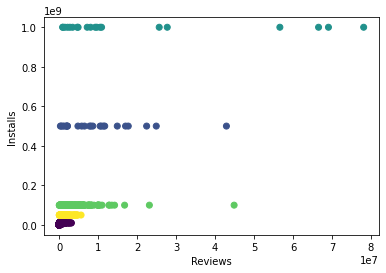

In [14]:
kmIR = KMeans(n_clusters=5).fit(Apps[["Reviews", "Installs"]])

plt.scatter(Apps["Reviews"], Apps["Installs"], c=kmIR.labels_)
plt.xlabel("Reviews")
plt.ylabel("Installs")
plt.show()

Existe una evidente relación entre el número de reseñas y el de descargas, pues si una aplicación posee $n$ reviews entonces debe tener como mínimo $n$ descargas (asumiendo que cada usuari sólo puede dar una reseña). Sin embargo, como se aprecia en el gráfico, la relación entre ambas se aleja bastante de ser una biyección.

Es muy poco probable que se conosca el número de reseñas pero no el de descargas, por lo que se propone buscar métodos de clasificar descargas sin utilizar el número de reseñas directamente.

### PCA - Datos del Texto

Como existe alta correlación entre varios de los datos del texto de las reseñas, se propone reducir su dimensionalidad a 2 (decisión arbitraria) por medio de _principal component analisys_.

In [15]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

In [16]:
svd = TruncatedSVD(2)
#normalizer = Normalizer(copy=False)
#lsa = make_pipeline(svd, normalizer)
redCount = svd.fit_transform(App_Review2.iloc[:,19:28])

In [91]:
def reEscale(data, a, b):
    m = min(data)
    M = max(data)
    p = (b-a)/(M-m)
    c = (a*M-b*m)/(M-m)
    data2 = np.zeros(len(data))
    for i in range(len(data)):
        data2[i] = p*data[i]+c
    return data2.copy()

In [20]:
App_Review3 = App_Review2.iloc[:,2:13].copy()
App_Review3["textData1"] = reEscale(redCount.transpose()[0], 0, 1)
App_Review3["textData2"] = reEscale(redCount.transpose()[1], 0, 1)
# Labels quedan en App_Review2

In [21]:
App_Review3

,sentiment_polarity_score,ease_of_reading_score,sentiment_subjectivity_score,spelling_quality_score,Category,Rating,Reviews,Size,Installs,Type,Price,textData1,textData2
0,0.470733,0.863879,0.495455,0.924240,15,4.0,2490,3.8,500000.0,0,0.0,0.086548,0.140834
1,0.185943,0.844815,0.455340,0.899209,26,3.8,48732,20.0,10000000.0,0,0.0,0.176441,0.375570
2,0.318145,0.851240,0.591098,0.892667,20,4.7,23160,26.0,1000000.0,0,0.0,0.157990,0.091707
3,0.196290,0.858710,0.557315,0.894876,14,4.6,214878,10.0,10000000.0,0,0.0,0.034185,0.070185
4,0.449566,0.868229,0.520573,0.828556,23,4.2,115773,NaN,10000000.0,0,0.0,0.064903,0.132629
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,0.031499,0.844228,0.477397,0.843576,31,4.2,6449,NaN,5000000.0,0,0.0,0.413262,0.404077
603,0.018378,0.840878,0.449354,0.858499,31,3.9,3484,3.0,10000000.0,0,0.0,0.441927,0.510170
604,-0.051705,0.843891,0.494052,0.838303,27,3.6,13223,2.8,10000000.0,0,0.0,0.482637,0.485207
605,0.004106,0.848932,0.334344,0.860348,18,3.5,6145,13.0,10000000.0,0,0.0,0.264826,0.290945


# Clasificación

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_score

In [23]:
def precision0micro(model, X, y):
    y_pred = model.predict(X)
    return precision_score(y, y_pred, zero_division=0, average='micro')

def precision0macro(model, X, y):
    y_pred = model.predict(X)
    return precision_score(y, y_pred, zero_division=0, average='macro')

def mean(a):
    n = len(a)
    t = sum(a)
    return t/n

def crossVal(X, y, model, k, re, n, m):
    re[0][m][n] = mean(cross_val_score(model, X, y, cv=k, scoring="accuracy"))
    re[1][m][n] = mean(cross_val_score(model, X, y, cv=k, scoring=precision0micro))
    re[2][m][n] = mean(cross_val_score(model, X, y, cv=k, scoring=precision0macro))
    re[3][m][n] = mean(cross_val_score(model, X, y, cv=k, scoring="recall_micro"))
    re[4][m][n] = mean(cross_val_score(model, X, y, cv=k, scoring="recall_macro"))
    re[5][m][n] = mean(cross_val_score(model, X, y, cv=k, scoring="f1_micro"))
    re[6][m][n] = mean(cross_val_score(model, X, y, cv=k, scoring="f1_macro"))

In [24]:
results_score = np.zeros([7,4,10])

In [100]:
cat_dt_r = []
label_cat_r = []
label_cat_r2 = []
for dt in cat_dt:
    cat_dt_r.append(dt[dt.Reviews < 100000][["Rating", "Reviews", "Size", "Type", "Content.Rating"]].copy())
    label_cat_r2.append(dt[dt.Reviews < 100000][["Installs"]])
    label_cat_r.append(dt[dt.Reviews < 100000][["Installs_Q"]])

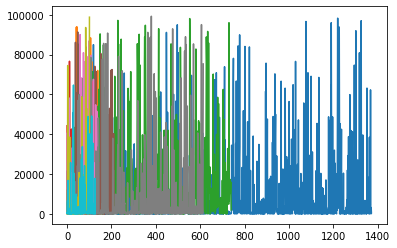

In [101]:
for dt in cat_dt_r:
    plt.plot(dt["Reviews"])
plt.show()

In [102]:
for dt in cat_dt_r:
    dt["Reviews"] = reEscale(np.array(dt.Reviews), 0, 1)
    dt["Size"] = reEscale(np.array(dt.Size), 0, 1)
    dt["Rating"] = reEscale(np.array(dt.Rating), 0, 1)
    dt["Content.Rating"] = reEscale(np.array(dt["Content.Rating"]), 0, 1)

In [103]:
cat_dt_r[rd.randint(0,9)]

,Rating,Reviews,Size,Type,Content.Rating
0,0.666667,0.062267,0.180445,0,0.0
1,0.733333,0.029618,0.101711,0,0.0
2,0.233333,0.006919,0.141078,1,0.0
3,0.333333,0.001477,0.151814,1,0.0
4,1.000000,0.003343,0.098132,0,0.0
...,...,...,...,...,...
69,0.733333,0.005131,0.534751,0,0.0
70,0.433333,0.045165,1.000000,0,0.0
71,0.966667,0.000466,0.076659,0,0.0
72,0.300000,0.009095,0.928423,0,0.0


### Cross Validation

In [104]:
# Árbol de Decisión
for i in range(10):
    crossVal(cat_dt_r[i], label_cat_r[i], DecisionTreeClassifier(), 5, results_score, i, 0)

# K-Nearest Neighbors
for i in range(10):
    crossVal(cat_dt_r[i], np.ravel(label_cat_r[i]), KNeighborsClassifier(n_neighbors=10), 5, results_score, i, 1) # k=10 es arbitrario

# Naive Bayes
for i in range(10):
    crossVal(cat_dt_r[i], np.ravel(label_cat_r[i]), GaussianNB(), 5, results_score, i, 2)

# Support Vector Machine
for i in range(10):
    crossVal(cat_dt_r[i], np.ravel(label_cat_r[i]), SVC(), 5, results_score, i, 3) # no usar 'linear'

### Resultados

In [29]:
models = ["Tree", "KNN", "Naive", "SVM"]

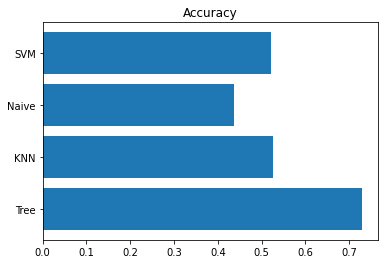

In [105]:
plt.barh(models, list(map(mean, results_score[0])))
plt.title("Accuracy")
plt.show()

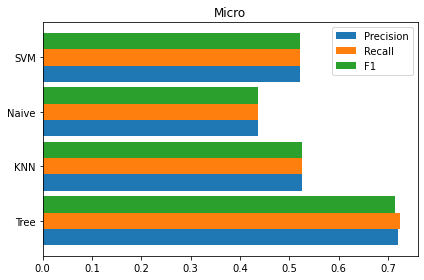

In [106]:
m = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots()
pre = ax.barh(m-width, list(map(mean, results_score[1])), width, label="Precision")
rec = ax.barh(m, list(map(mean, results_score[3])), width, label="Recall")
f1 = ax.barh(m+width, list(map(mean, results_score[5])), width, label="F1")

ax.set_title("Micro")
ax.set_yticks(m)
ax.set_yticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()

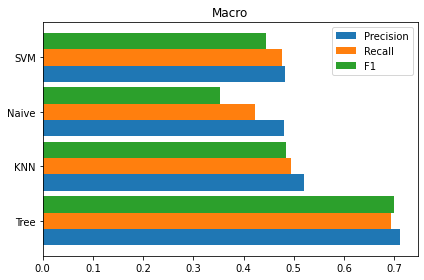

In [107]:
m = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots()
pre = ax.barh(m-width, list(map(mean, results_score[2])), width, label="Precision")
rec = ax.barh(m, list(map(mean, results_score[4])), width, label="Recall")
f1 = ax.barh(m+width, list(map(mean, results_score[6])), width, label="F1")

ax.set_title("Macro")
ax.set_yticks(m)
ax.set_yticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()

## Clasificación de Aplicaciones de Pago

Como la cantidad de aplicaciones de pago en vastante menor, para este caso no se subdivide en categorías.

In [109]:
Paid_Apps = Apps[Apps.Type==1][["Installs", "Reviews", "Size", "Price", "Content.Rating", "Rating"]].dropna(how='any').copy()
Paid_Apps = Paid_Apps[Paid_Apps.Reviews < 1000000]
Paid_Apps = Paid_Apps[Paid_Apps.Price < 60]

def contToNum(contentRating):
    n = len(contentRating)
    num = np.zeros(n)
    for i in range(n):
        if contentRating[i] == "Everyone 10+":
            num[i] = 0.5
        if contentRating[i] == "Teen":
            num[i] = 1.0
        if contentRating[i] == "Mature 17+":
            num[i] = 1.5
        if contentRating[i] == "Adults only 18+":
            num[i] = 2.0
    return num

Paid_Apps["Content.Rating"] = contToNum(np.array(Paid_Apps["Content.Rating"]))

In [110]:
def qLabeler(data):
    q1 = data.quantile(0.25)
    q2 = data.quantile(0.5)
    q3 = data.quantile(0.75)
    labels = np.array(data)
    for i in range(len(labels)):
        if labels[i] <= q1:
            labels[i] = 0
        elif labels[i] < q2:
            labels[i] = 1
        elif labels[i] < q3:
            labels[i] = 2
        elif labels[i]:
            labels[i] = 3
    return labels

paid_labels = qLabeler(Paid_Apps.Installs)

del Paid_Apps["Installs"]

In [111]:
Paid_Apps["Rating"] = reEscale(np.array(Paid_Apps.Rating), 0, 2)
Paid_Apps["Size"] = reEscale(np.array(Paid_Apps.Size), 0, 2)
Paid_Apps["Price"] = reEscale(np.array(Paid_Apps.Price), 0, 2)
Paid_Apps["Reviews"] = reEscale(np.array(Paid_Apps.Price), 0, 2)

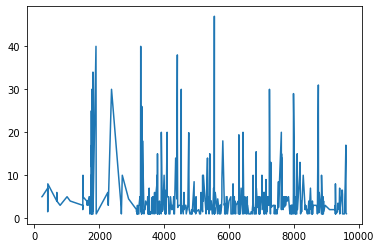

In [115]:
plt.plot(Paid_Apps.Price)
plt.show()

In [112]:
def crossVal2(X, y, model, k, re, m):
    re[0][m] = mean(cross_val_score(model, X, y, cv=k, scoring="accuracy"))
    re[1][m] = mean(cross_val_score(model, X, y, cv=k, scoring=precision0micro))
    re[2][m] = mean(cross_val_score(model, X, y, cv=k, scoring=precision0macro))
    re[3][m] = mean(cross_val_score(model, X, y, cv=k, scoring="recall_micro"))
    re[4][m] = mean(cross_val_score(model, X, y, cv=k, scoring="recall_macro"))
    re[5][m] = mean(cross_val_score(model, X, y, cv=k, scoring="f1_micro"))
    re[6][m] = mean(cross_val_score(model, X, y, cv=k, scoring="f1_macro"))

paid_result = np.zeros([7,4])

In [113]:
# Árbol de Decisión
crossVal2(Paid_Apps, paid_labels, DecisionTreeClassifier(), 5, paid_result, 0)

# KNN
crossVal2(Paid_Apps, paid_labels, KNeighborsClassifier(n_neighbors=10), 5, paid_result, 1) # k=10 es arbitrario

# Naive Bayes
crossVal2(Paid_Apps, paid_labels, GaussianNB(), 5, paid_result, 2)

# Support Vector Machine
crossVal2(Paid_Apps, paid_labels, SVC(), 5, paid_result, 3)

### Resultados

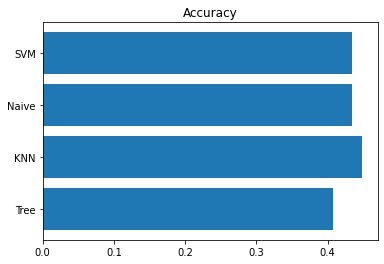

In [114]:
plt.barh(models, paid_result[0])
plt.title("Accuracy")
plt.show()

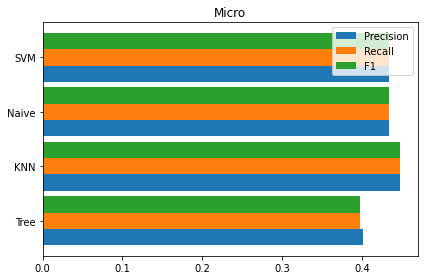

In [115]:
m = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots()
pre = ax.barh(m-width, paid_result[1], width, label="Precision")
rec = ax.barh(m, paid_result[3], width, label="Recall")
f1 = ax.barh(m+width, paid_result[5], width, label="F1")

ax.set_title("Micro")
ax.set_yticks(m)
ax.set_yticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()

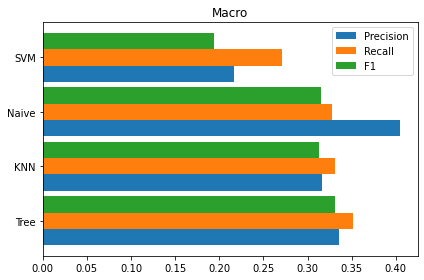

In [116]:
m = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots()
pre = ax.barh(m-width, paid_result[2], width, label="Precision")
rec = ax.barh(m, paid_result[4], width, label="Recall")
f1 = ax.barh(m+width, paid_result[6], width, label="F1")

ax.set_title("Macro")
ax.set_yticks(m)
ax.set_yticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()

## Análisis de Texto

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

In [33]:
hashVectorizer = HashingVectorizer(stop_words=None, alternate_sign=False)
text_dt = hashVectorizer.fit_transform(Reviews["Translated_Review"])

svd = TruncatedSVD(100) # arbitrario
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
text_dt = lsa.fit_transform(text_dt)

In [34]:
text_labels_sp = np.ravel(Reviews["sentiment_polarity"])
text_labels_ss = np.ravel(Reviews["sentiment_subjectivity"])
text_labels_sq = np.ravel(Reviews["spelling_quality"])

In [35]:
sp_result = np.zeros([7, 4])
ss_result = np.zeros([7, 4])
sq_result = np.zeros([7, 4])

### Árbol de Decisión

In [71]:
# Sentiment Polarity
crossVal2(text_dt, text_labels_sp, DecisionTreeClassifier(), 5, sp_result, 0)

In [72]:
# Sentiment Subjectivity
crossVal2(text_dt, text_labels_ss, DecisionTreeClassifier(), 5, ss_result, 0)

In [73]:
# Spelling Quality
crossVal2(text_dt, text_labels_sq, DecisionTreeClassifier(), 5, sq_result, 0)

### KNN

In [36]:
# Sentiment Polarity
crossVal2(text_dt, text_labels_sp, KNeighborsClassifier(n_neighbors=10), 5, sp_result, 1)

In [37]:
# Sentiment Subjectivity
crossVal2(text_dt, text_labels_ss, KNeighborsClassifier(n_neighbors=10), 5, ss_result, 1)

In [38]:
# Spelling Quality
crossVal2(text_dt, text_labels_sq, KNeighborsClassifier(n_neighbors=10), 5, sq_result, 1)

### Naive Bayes

In [40]:
# Sentiment Polarity
crossVal2(text_dt, text_labels_sp, GaussianNB(), 5, sp_result, 2)

In [41]:
# Sentiment Subjectivity
crossVal2(text_dt, text_labels_ss, GaussianNB(), 5, ss_result, 2)

In [42]:
# Spelling Quality
crossVal2(text_dt, text_labels_sq, GaussianNB(), 5, sq_result, 2)

### Support Vector Machine

In [44]:
# Sentiment Polarity
crossVal2(text_dt, text_labels_sp, SVC(), 5, sp_result, 3)

In [45]:
# Sentiment Subjectivity
crossVal2(text_dt, text_labels_ss, SVC(), 5, ss_result, 3)

In [46]:
# Spelling Quality
crossVal2(text_dt, text_labels_sq, SVC(), 5, sq_result, 3)

### Resultados

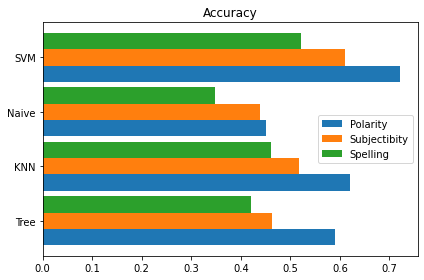

In [74]:
m = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots()
pol = ax.barh(m-width, sp_result[0], width, label="Polarity")
sub = ax.barh(m, ss_result[0], width, label="Subjectibity")
spe = ax.barh(m+width, sq_result[0], width, label="Spelling")

ax.set_title("Accuracy")
ax.set_yticks(m)
ax.set_yticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()

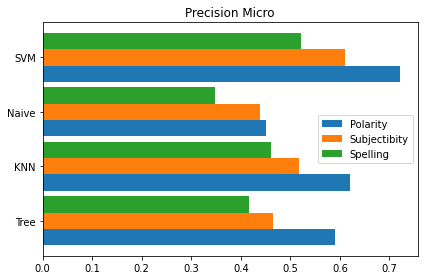

In [75]:
m = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots()
pol = ax.barh(m-width, sp_result[1], width, label="Polarity")
sub = ax.barh(m, ss_result[1], width, label="Subjectibity")
spe = ax.barh(m+width, sq_result[1], width, label="Spelling")

ax.set_title("Precision Micro")
ax.set_yticks(m)
ax.set_yticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()

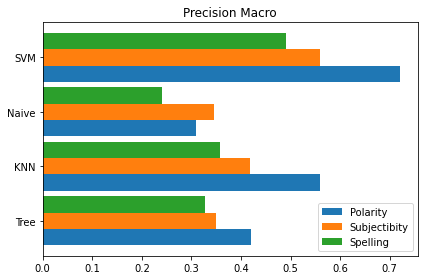

In [76]:
m = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots()
pol = ax.barh(m-width, sp_result[2], width, label="Polarity")
sub = ax.barh(m, ss_result[2], width, label="Subjectibity")
spe = ax.barh(m+width, sq_result[2], width, label="Spelling")

ax.set_title("Precision Macro")
ax.set_yticks(m)
ax.set_yticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()

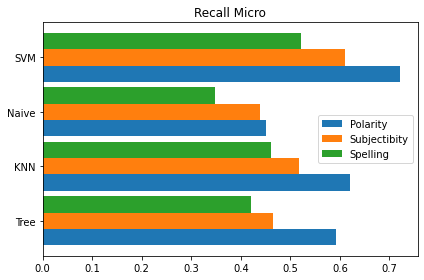

In [77]:
m = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots()
pol = ax.barh(m-width, sp_result[3], width, label="Polarity")
sub = ax.barh(m, ss_result[3], width, label="Subjectibity")
spe = ax.barh(m+width, sq_result[3], width, label="Spelling")

ax.set_title("Recall Micro")
ax.set_yticks(m)
ax.set_yticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()

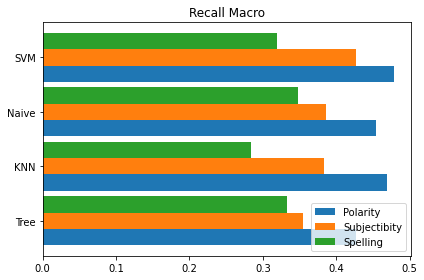

In [78]:
m = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots()
pol = ax.barh(m-width, sp_result[4], width, label="Polarity")
sub = ax.barh(m, ss_result[4], width, label="Subjectibity")
spe = ax.barh(m+width, sq_result[4], width, label="Spelling")

ax.set_title("Recall Macro")
ax.set_yticks(m)
ax.set_yticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()

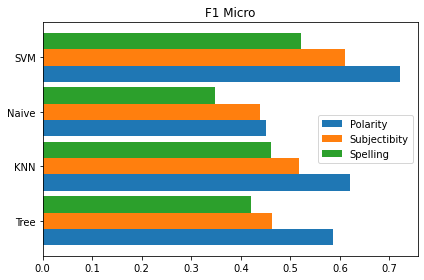

In [79]:
m = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots()
pol = ax.barh(m-width, sp_result[5], width, label="Polarity")
sub = ax.barh(m, ss_result[5], width, label="Subjectibity")
spe = ax.barh(m+width, sq_result[5], width, label="Spelling")

ax.set_title("F1 Micro")
ax.set_yticks(m)
ax.set_yticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()

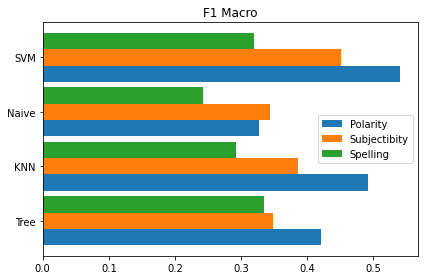

In [80]:
m = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots()
pol = ax.barh(m-width, sp_result[6], width, label="Polarity")
sub = ax.barh(m, ss_result[6], width, label="Subjectibity")
spe = ax.barh(m+width, sq_result[6], width, label="Spelling")

ax.set_title("F1 Macro")
ax.set_yticks(m)
ax.set_yticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()

## Clasificación de Rating según Reviews

In [117]:
X2 = App_Review3[["sentiment_polarity_score","ease_of_reading_score","sentiment_subjectivity_score",
       "spelling_quality_score","textData1","textData2"]]

label_r = np.ravel(App_Review2["Installs_Q"])

In [119]:
text_result = np.zeros([7, 4])

In [120]:
# Árbol de Decisión
crossVal2(X2, label_r, DecisionTreeClassifier(), 5, text_result, 0)

# KNN
crossVal2(X2, label_r, KNeighborsClassifier(n_neighbors=10), 5, text_result, 1)

# Naive Bayes
crossVal2(X2, label_r, GaussianNB(), 5, text_result, 2)

# Support Vector Machine
crossVal2(X2, label_r, SVC(), 5, text_result, 3)

### Resultados

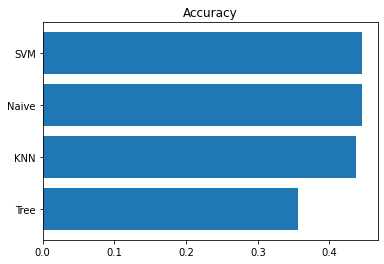

In [121]:
plt.barh(models, text_result[0])
plt.title("Accuracy")
plt.show()

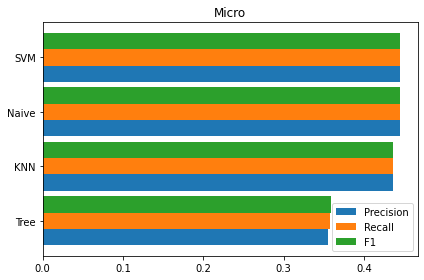

In [122]:
m = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots()
pre = ax.barh(m-width, text_result[1], width, label="Precision")
rec = ax.barh(m, text_result[3], width, label="Recall")
f1 = ax.barh(m+width, text_result[5], width, label="F1")

ax.set_title("Micro")
ax.set_yticks(m)
ax.set_yticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()

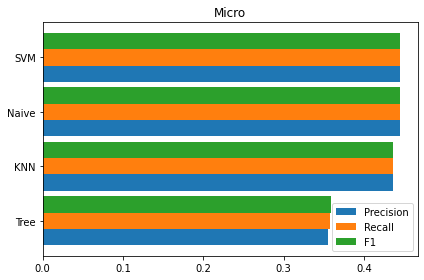

In [122]:
m = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots()
pre = ax.barh(m-width, text_result[1], width, label="Precision")
rec = ax.barh(m, text_result[3], width, label="Recall")
f1 = ax.barh(m+width, text_result[5], width, label="F1")

ax.set_title("Micro")
ax.set_yticks(m)
ax.set_yticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()